In [1]:
import os
import pandas as pd
import pathlib
import numpy as np

cwd = os.getcwd()
os.chdir("C:\\Users\\IlzeA\\Dropbox\\Horizon2020\\DB1")

data = np.zeros((30, 300))

for i in range (1, 31):
    
    df = pd.read_table("matrix_" + str(i) + ".dat", sep=",", header = None)
    df = df.to_numpy()
    data[i-1] = df.flatten()
    
print (data)

[[ 8.9633641e-01 -3.0457142e-04  1.2127538e-03 ...  9.6707571e-01
  -1.4281706e-03  1.6839671e-03]
 [ 1.7926729e+00 -6.0914279e-04  2.4255282e-03 ...  1.9341514e+00
  -2.8563411e-03  3.3679459e-03]
 [ 2.6890093e+00 -9.1371415e-04  3.6383026e-03 ...  2.9012272e+00
  -4.2845117e-03  5.0519247e-03]
 ...
 [ 2.5204844e+01  8.1913525e-04 -2.2467139e-04 ...  2.7125985e+01
  -1.6332443e-03  1.0689106e-03]
 [ 2.6105335e+01  8.7596433e-04 -3.2738884e-04 ...  2.8094916e+01
  -1.5770190e-03  9.7391294e-04]
 [ 2.7005815e+01  9.3183640e-04 -4.2642689e-04 ...  2.9063843e+01
  -1.5246717e-03  8.8376163e-04]]


In [2]:
cwd = os.getcwd()
os.chdir("C:\\Users\\IlzeA\\Dropbox\\Horizon2020\\DB1")

labels = np.zeros((30, 1))

for i in range (1, 31):
    
    df = pd.read_table("label_" + str(i) + ".dat", sep=",", header = None)
    df = df.to_numpy()
    df = df[1]
    labels[i-1] = df.flatten()
    
print (labels)

[[ 0.6485]
 [ 1.2971]
 [ 1.9456]
 [ 2.5942]
 [ 3.3369]
 [ 4.1136]
 [ 4.8266]
 [ 5.5303]
 [ 6.2917]
 [ 7.148 ]
 [ 8.1481]
 [ 9.2089]
 [10.3037]
 [11.3844]
 [12.4522]
 [13.4972]
 [14.5101]
 [15.5053]
 [16.4788]
 [17.4262]
 [18.3805]
 [19.3043]
 [20.2262]
 [21.1519]
 [22.0815]
 [23.0143]
 [23.9352]
 [24.8256]
 [25.7327]
 [26.639 ]]


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

In [5]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

import keras as keras
keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = 300))
model.add(Dropout(rate=0.1))

model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate=0.1))

model.add(Dense(units = 1, activation = None))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 17,651
Trainable params: 17,651
Non-trainable params: 0
_________________________________________________________________


In [6]:
optim = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mean_squared_error'])

In [7]:
from keras.callbacks import History 
history = History()

from keras.callbacks import ModelCheckpoint  

epochs = 300

checkpointer = ModelCheckpoint(filepath='saved_models/weights_test_data_1.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=epochs, batch_size=20, callbacks=[checkpointer, history], verbose=1)


Instructions for updating:
Use tf.cast instead.
Train on 21 samples, validate on 6 samples
Epoch 1/300
21/21 [==============================] - 0s 11ms/step - loss: 246.7706 - mean_squared_error: 246.7706 - val_loss: 94.6435 - val_mean_squared_error: 94.6435

Epoch 00001: val_loss improved from inf to 94.64352, saving model to saved_models/weights_test_data_1.hdf5
Epoch 2/300
21/21 [==============================] - 0s 141us/step - loss: 171.0351 - mean_squared_error: 171.0351 - val_loss: 60.3743 - val_mean_squared_error: 60.3743

Epoch 00002: val_loss improved from 94.64352 to 60.37433, saving model to saved_models/weights_test_data_1.hdf5
Epoch 3/300
21/21 [==============================] - 0s 190us/step - loss: 114.6150 - mean_squared_error: 114.6150 - val_loss: 32.2606 - val_mean_squared_error: 32.2606

Epoch 00003: val_loss improved from 60.37433 to 32.26059, saving model to saved_models/weights_test_data_1.hdf5
Epoch 4/300
21/21 [==============================] - 0s 142us/step - 

21/21 [==============================] - 0s 333us/step - loss: 4.7442 - mean_squared_error: 4.7442 - val_loss: 0.7161 - val_mean_squared_error: 0.7161

Epoch 00035: val_loss did not improve from 0.63464
Epoch 36/300
21/21 [==============================] - 0s 190us/step - loss: 4.5894 - mean_squared_error: 4.5894 - val_loss: 0.8606 - val_mean_squared_error: 0.8606

Epoch 00036: val_loss did not improve from 0.63464
Epoch 37/300
21/21 [==============================] - 0s 190us/step - loss: 5.9554 - mean_squared_error: 5.9554 - val_loss: 0.7129 - val_mean_squared_error: 0.7129

Epoch 00037: val_loss did not improve from 0.63464
Epoch 38/300
21/21 [==============================] - 0s 142us/step - loss: 5.3228 - mean_squared_error: 5.3228 - val_loss: 0.6469 - val_mean_squared_error: 0.6469

Epoch 00038: val_loss did not improve from 0.63464
Epoch 39/300
21/21 [==============================] - 0s 237us/step - loss: 6.5494 - mean_squared_error: 6.5494 - val_loss: 0.9390 - val_mean_squared

21/21 [==============================] - 0s 143us/step - loss: 4.6666 - mean_squared_error: 4.6666 - val_loss: 0.6254 - val_mean_squared_error: 0.6254

Epoch 00072: val_loss did not improve from 0.61290
Epoch 73/300
21/21 [==============================] - 0s 142us/step - loss: 3.3341 - mean_squared_error: 3.3341 - val_loss: 0.6726 - val_mean_squared_error: 0.6726

Epoch 00073: val_loss did not improve from 0.61290
Epoch 74/300
21/21 [==============================] - 0s 143us/step - loss: 2.9152 - mean_squared_error: 2.9152 - val_loss: 1.1253 - val_mean_squared_error: 1.1253

Epoch 00074: val_loss did not improve from 0.61290
Epoch 75/300
21/21 [==============================] - 0s 142us/step - loss: 8.0059 - mean_squared_error: 8.0059 - val_loss: 0.7935 - val_mean_squared_error: 0.7935

Epoch 00075: val_loss did not improve from 0.61290
Epoch 76/300
21/21 [==============================] - 0s 190us/step - loss: 3.9489 - mean_squared_error: 3.9489 - val_loss: 0.7423 - val_mean_squared

21/21 [==============================] - 0s 143us/step - loss: 5.0427 - mean_squared_error: 5.0427 - val_loss: 0.8182 - val_mean_squared_error: 0.8182

Epoch 00109: val_loss did not improve from 0.57788
Epoch 110/300
21/21 [==============================] - 0s 142us/step - loss: 5.0170 - mean_squared_error: 5.0170 - val_loss: 1.2110 - val_mean_squared_error: 1.2110

Epoch 00110: val_loss did not improve from 0.57788
Epoch 111/300
21/21 [==============================] - 0s 142us/step - loss: 4.4367 - mean_squared_error: 4.4367 - val_loss: 1.8537 - val_mean_squared_error: 1.8537

Epoch 00111: val_loss did not improve from 0.57788
Epoch 112/300
21/21 [==============================] - 0s 190us/step - loss: 6.3340 - mean_squared_error: 6.3340 - val_loss: 1.8384 - val_mean_squared_error: 1.8384

Epoch 00112: val_loss did not improve from 0.57788
Epoch 113/300
21/21 [==============================] - 0s 142us/step - loss: 6.0406 - mean_squared_error: 6.0406 - val_loss: 1.3519 - val_mean_squ

21/21 [==============================] - 0s 190us/step - loss: 9.5745 - mean_squared_error: 9.5745 - val_loss: 2.2455 - val_mean_squared_error: 2.2455

Epoch 00146: val_loss did not improve from 0.54105
Epoch 147/300
21/21 [==============================] - 0s 142us/step - loss: 8.7784 - mean_squared_error: 8.7784 - val_loss: 2.7598 - val_mean_squared_error: 2.7598

Epoch 00147: val_loss did not improve from 0.54105
Epoch 148/300
21/21 [==============================] - 0s 190us/step - loss: 3.9019 - mean_squared_error: 3.9019 - val_loss: 2.1857 - val_mean_squared_error: 2.1857

Epoch 00148: val_loss did not improve from 0.54105
Epoch 149/300
21/21 [==============================] - 0s 142us/step - loss: 7.5957 - mean_squared_error: 7.5957 - val_loss: 1.1458 - val_mean_squared_error: 1.1458

Epoch 00149: val_loss did not improve from 0.54105
Epoch 150/300
21/21 [==============================] - 0s 143us/step - loss: 4.3971 - mean_squared_error: 4.3971 - val_loss: 0.5353 - val_mean_squ

21/21 [==============================] - 0s 143us/step - loss: 7.8082 - mean_squared_error: 7.8082 - val_loss: 0.5635 - val_mean_squared_error: 0.5635

Epoch 00183: val_loss did not improve from 0.50889
Epoch 184/300
21/21 [==============================] - 0s 190us/step - loss: 7.0388 - mean_squared_error: 7.0388 - val_loss: 0.6773 - val_mean_squared_error: 0.6773

Epoch 00184: val_loss did not improve from 0.50889
Epoch 185/300
21/21 [==============================] - 0s 142us/step - loss: 2.5607 - mean_squared_error: 2.5607 - val_loss: 2.1709 - val_mean_squared_error: 2.1709

Epoch 00185: val_loss did not improve from 0.50889
Epoch 186/300
21/21 [==============================] - 0s 190us/step - loss: 7.9742 - mean_squared_error: 7.9742 - val_loss: 2.4417 - val_mean_squared_error: 2.4417

Epoch 00186: val_loss did not improve from 0.50889
Epoch 187/300
21/21 [==============================] - 0s 190us/step - loss: 6.4944 - mean_squared_error: 6.4944 - val_loss: 1.4095 - val_mean_squ

21/21 [==============================] - 0s 190us/step - loss: 7.8201 - mean_squared_error: 7.8201 - val_loss: 1.8366 - val_mean_squared_error: 1.8366

Epoch 00220: val_loss did not improve from 0.49241
Epoch 221/300
21/21 [==============================] - 0s 191us/step - loss: 7.5445 - mean_squared_error: 7.5445 - val_loss: 0.5504 - val_mean_squared_error: 0.5504

Epoch 00221: val_loss did not improve from 0.49241
Epoch 222/300
21/21 [==============================] - 0s 142us/step - loss: 3.3690 - mean_squared_error: 3.3690 - val_loss: 1.2096 - val_mean_squared_error: 1.2096

Epoch 00222: val_loss did not improve from 0.49241
Epoch 223/300
21/21 [==============================] - 0s 190us/step - loss: 8.4999 - mean_squared_error: 8.4999 - val_loss: 2.7715 - val_mean_squared_error: 2.7715

Epoch 00223: val_loss did not improve from 0.49241
Epoch 224/300
21/21 [==============================] - 0s 143us/step - loss: 10.0898 - mean_squared_error: 10.0898 - val_loss: 2.4253 - val_mean_s

21/21 [==============================] - 0s 190us/step - loss: 3.3598 - mean_squared_error: 3.3598 - val_loss: 0.7460 - val_mean_squared_error: 0.7460

Epoch 00257: val_loss did not improve from 0.46178
Epoch 258/300
21/21 [==============================] - 0s 190us/step - loss: 3.4317 - mean_squared_error: 3.4317 - val_loss: 3.4448 - val_mean_squared_error: 3.4448

Epoch 00258: val_loss did not improve from 0.46178
Epoch 259/300
21/21 [==============================] - 0s 190us/step - loss: 12.2324 - mean_squared_error: 12.2324 - val_loss: 4.0003 - val_mean_squared_error: 4.0003

Epoch 00259: val_loss did not improve from 0.46178
Epoch 260/300
21/21 [==============================] - 0s 190us/step - loss: 16.5481 - mean_squared_error: 16.5481 - val_loss: 1.5632 - val_mean_squared_error: 1.5632

Epoch 00260: val_loss did not improve from 0.46178
Epoch 261/300
21/21 [==============================] - 0s 190us/step - loss: 7.7091 - mean_squared_error: 7.7091 - val_loss: 0.7363 - val_mean

21/21 [==============================] - 0s 142us/step - loss: 8.9330 - mean_squared_error: 8.9330 - val_loss: 0.4547 - val_mean_squared_error: 0.4547

Epoch 00294: val_loss did not improve from 0.41964
Epoch 295/300
21/21 [==============================] - 0s 237us/step - loss: 6.6327 - mean_squared_error: 6.6327 - val_loss: 0.8245 - val_mean_squared_error: 0.8245

Epoch 00295: val_loss did not improve from 0.41964
Epoch 296/300
21/21 [==============================] - 0s 142us/step - loss: 6.1264 - mean_squared_error: 6.1264 - val_loss: 0.8688 - val_mean_squared_error: 0.8688

Epoch 00296: val_loss did not improve from 0.41964
Epoch 297/300
21/21 [==============================] - 0s 190us/step - loss: 4.1481 - mean_squared_error: 4.1481 - val_loss: 0.7206 - val_mean_squared_error: 0.7206

Epoch 00297: val_loss did not improve from 0.41964
Epoch 298/300
21/21 [==============================] - 0s 190us/step - loss: 4.2147 - mean_squared_error: 4.2147 - val_loss: 0.6708 - val_mean_squ

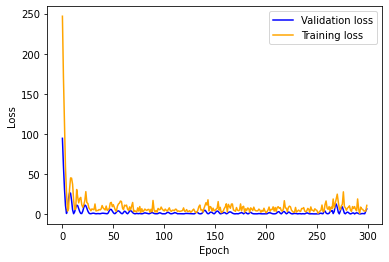

In [12]:
import matplotlib.pyplot as plt 

fig = plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = "Validation loss")
plt.plot(history.history['loss'], color = 'orange', label = "Training loss")
plt.legend()


In [11]:
print("Evaluate test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate test data
3/3 [==============================] - 0s 666us/step
test loss, test acc: [13.316363334655762, 13.316363334655762]


In [10]:
print("Predictions for test data")
predictions = model.predict(X_test)
print(predictions)

print("Test data")
print(y_test)


Predictions for test data
[[19.556711 ]
 [ 7.8667955]
 [ 1.2263831]]
Test data
[[25.7327]
 [ 9.2089]
 [ 1.2971]]
